# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Dataframe

In [2]:
df = pd.read_csv('..\datasets\Customers.csv')

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\benso\AppData\Local\Temp\ipykernel_18656\3999121799.py:1: SyntaxWarning: invalid escape sequence '\d'
  df = pd.read_csv('..\datasets\Customers.csv')


In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
df.nunique()

CustomerID                200
Gender                      2
Age                        51
Annual Income (k$)         64
Spending Score (1-100)     84
dtype: int64

In [6]:
df.value_counts()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
1           Male    19   15                  39                        1
138         Male    32   73                  73                        1
128         Male    40   71                  95                        1
129         Male    59   71                  11                        1
130         Male    38   71                  75                        1
                                                                      ..
70          Female  32   48                  47                        1
71          Male    70   49                  55                        1
72          Female  47   49                  42                        1
73          Female  60   50                  49                        1
200         Male    30   137                 83                        1
Name: count, Length: 200, dtype: int64

# Verificar existência de outliers

<Axes: ylabel='Spending Score (1-100)'>

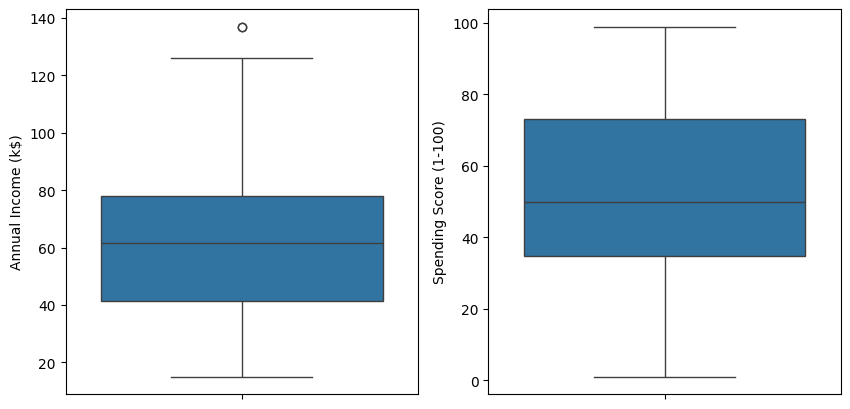

In [7]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(data=df, y="Annual Income (k$)")
plt.subplot(1,2,2)
sns.boxplot(data=df, y="Spending Score (1-100)")

# Upper whisker = (78 - 41.5) * 1.5 + 78 = 132.75

In [8]:
df[df['Annual Income (k$)']>132.75]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
198,199,Male,32,137,18
199,200,Male,30,137,83


In [9]:
df=df[df['Annual Income (k$)']<=132.75]
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
193,194,Female,38,113,91
194,195,Female,47,120,16
195,196,Female,35,120,79
196,197,Female,45,126,28


## Univariate analysis - categorical data

Text(0.5, 0, 'Género')

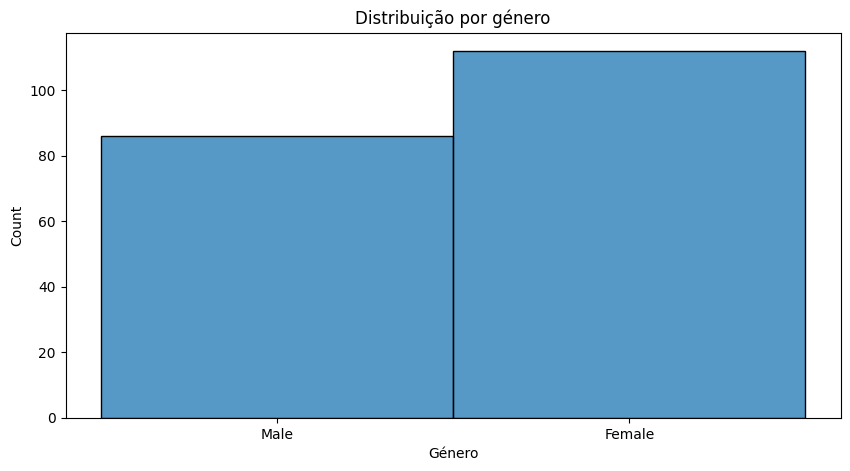

In [10]:
# Checking gender distribution

plt.figure(figsize=(10,5))
sns.histplot(df.Gender)
plt.title('Distribuição por género',fontsize=12)
plt.xlabel('Género',fontsize=10)

### Conclusão: mais clientes femininos do que masculinos

## Univariate analysis - numerical data

Text(0.5, 9.444444444444438, 'Idade')

<Figure size 1000x500 with 0 Axes>

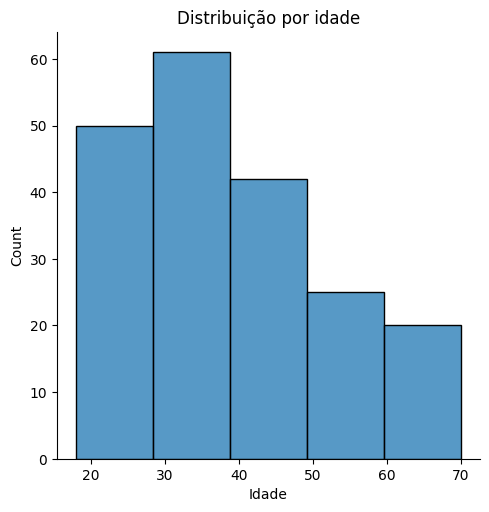

In [11]:
# Checking age distribution

plt.figure(figsize=(10,5))
sns.displot(df.Age, binwidth=10)
plt.title('Distribuição por idade',fontsize=12)
plt.xlabel('Idade',fontsize=10)

### Conclusão: Temos mais cliente entre 18 e 41 anos

Text(0.5, 9.444444444444438, 'Count')

<Figure size 1000x500 with 0 Axes>

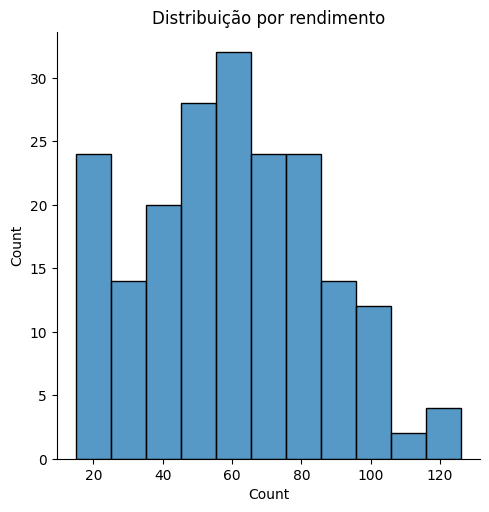

In [12]:
# Checking income distribution

plt.figure(figsize=(10,5))
sns.displot(df['Annual Income (k$)'], binwidth=10)
plt.title('Distribuição por rendimento',fontsize=12)
plt.xlabel('Count',fontsize=10)

### Conclusão: A maioria dos clientes tem rendimento entre os 45 e os 85k$.
### Temos também um número consideravvel de clientes com rendimentos entre os 15 e 25K$.

# Bivariate Analysis - Numerica-Numerical Data Type

Text(0.5, 1.0, 'Redimento anual vs Spending score')

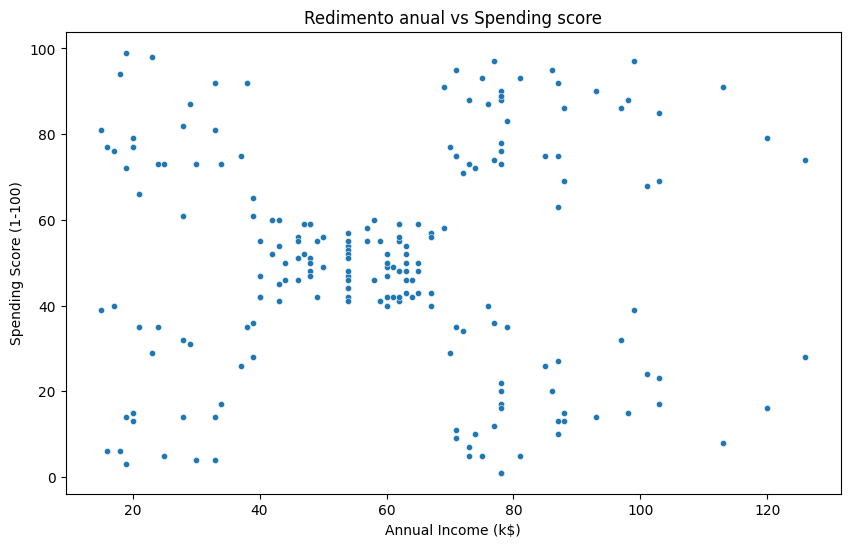

In [15]:
# Spending score vs Annual Income

plt.figure(figsize=(10,6))
sns.scatterplot(data=df,x='Annual Income (k$)',y='Spending Score (1-100)',s=20)
plt.title('Redimento anual vs Spending score')

# Pre-processed

In [16]:
from sklearn.preprocessing import StandardScaler

In [19]:
collumns2scale=["Spending Score (1-100)",'Annual Income (k$)']

# Create scaler
scaler=StandardScaler()

# Fit transform
df_scaled=scaler.fit_transform(df[collumns2scale])

df_scaled=pd.DataFrame(df_scaled)
df_scaled.columns=collumns2scale
df_scaled.head()

,Spending Score (1-100),Annual Income (k$)
0,-0.435989,-1.779171
1,1.199413,-1.779171
2,-1.720949,-1.739447
3,1.043661,-1.739447
4,-0.397051,-1.699723


# Criar modelo

In [20]:
from sklearn.cluster import KMeans

In [22]:
X=df_scaled[["Spending Score (1-100)",'Annual Income (k$)']]

# "Using elbow plot to find the optimizal of clusters"

In [23]:
import warnings
warnings.filterwarnings("ignore")

In [25]:
wcss=[]
for i in range(1,11):
    Kmeans=KMeans(n_clusters=i,n_init=10,init='k-means++',random_state=42)
    Kmeans.fit(X)
    wcss.append(Kmeans.inertia_)

Text(0, 0.5, 'wcss')

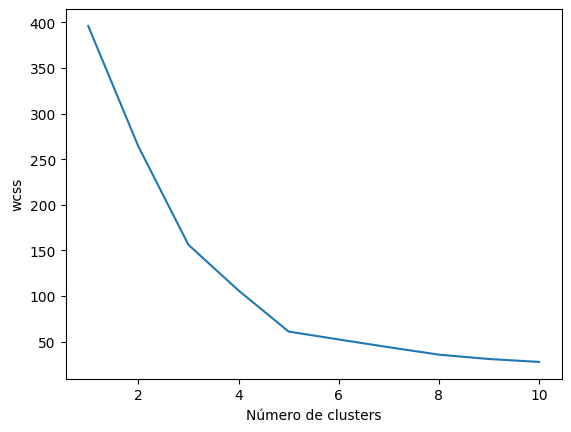

In [26]:
plt.plot(range(1,11),wcss)
plt.xlabel('Número de clusters')
plt.ylabel('wcss')